In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:

%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

загрузка изображения

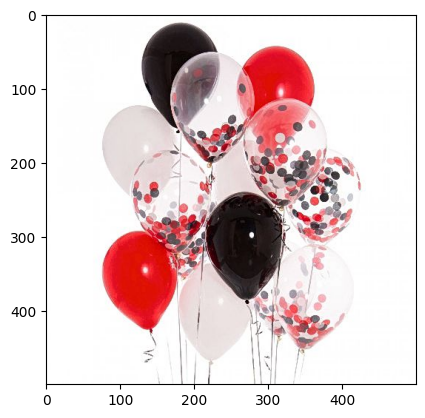

In [9]:
image = cv.imread('lab5.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

Преобразуем изображение в цветовую модель HSV, создадим 3D-визуализацию цветового пространства

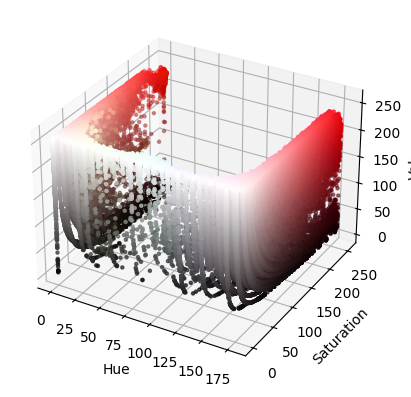

In [10]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Создадим и применим маску нужного нам оттенка красного к изображению

<Figure size 600x400 with 0 Axes>

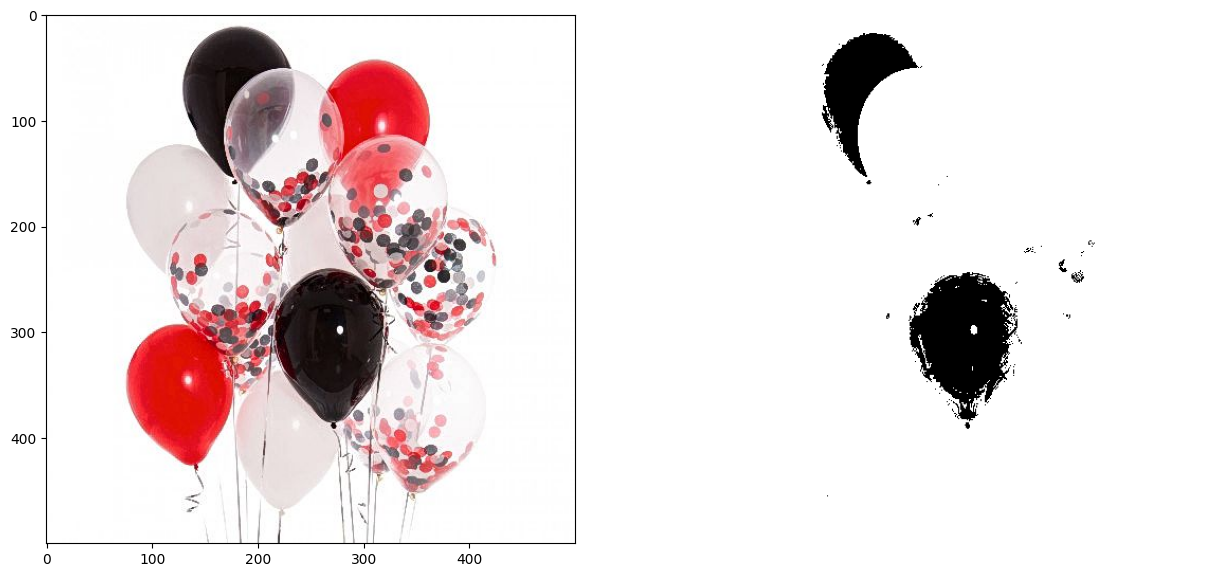

In [19]:
# [hue, saturation, value]

lower = np.array([0, 0, 0])
upper = np.array([180, 255, 50])

mask = cv.inRange(image_hsv, lower, upper)
mask_inverse = cv.bitwise_not(mask)
plt.figure(figsize=(6, 4))



plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
bitwise = cv.bitwise_and(image_rgb, image_rgb, 50)
plt.imshow(mask_inverse, cmap='gray')
plt.axis('off')
plt.show()
plt.show()

In [20]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(cv.cvtColor(result, cv.COLOR_RGB2GRAY), 8, cv.CV_32S)

print(f"Number of connected components: {num_labels}")

Number of connected components: 2
